In [1]:
from __future__ import division
import os
import re
import itertools
from datetime import datetime, timedelta
from sklearn import preprocessing
import imblearn
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
#08/29/2020
from __future__ import division
import os
import re
import itertools

from datetime import datetime, timedelta
from sklearn import preprocessing
import imblearn

folder_directory =os.getcwd()
os.chdir(folder_directory)
execfile('./functions/python_libraries.py')
execfile('./functions/LINK_revised.py')
execfile('./functions/parsing.py')  # Sam Way's Code
execfile('./functions/mixing.py')   # Sam Way's Code
execfile('./functions/create_adjacency_matrix.py')
np.seterr(divide='ignore', invalid='ignore')
y_predict_type = 'gender' # gender
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


percent_initially_unlabelled = [0.95,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.05]
percent_initially_labelled = np.subtract(1, percent_initially_unlabelled)

school = 'Amherst41.csv' 

## 3 iterations
x3 = pd.read_csv('../../code/refex-rolx-master-3/FB-data/out_union_0.50_FB_'+school+'-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x3[0]))})
x3 = x3.loc[:,1::] #drop IDs column
scaler.fit(x3) #transform each feature on [0,1]-scale
x3 = scaler.transform(x3)


y_train_y = pd.read_csv('../../data/FB100edges/gender_student_'+re.sub('\\.csv','',school) + '_gender.csv')
y3 = df_train.merge(y_train_y[['keys','gender_y']], ## will be in same order as features
        how = 'left',
        on = 'keys')

print(len(y_train_y))


np.unique(y_train_y.gender_y)
len(y_train_y.gender_y)


print np.min(np.unique(df_train['keys']))
print np.max(np.unique(df_train['keys']))
#print len(df_train['keys'])

print ''
print np.min(y_train_y['keys'])
print np.max(y_train_y['keys'])
print len(y3)

## all iterations
xall = pd.read_csv('../../code/refex-rolx-master/FB-data/out_union_0.50_FB_'+school+'-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,xall[0]))})
xall = xall.loc[:,1::] #drop IDs column
scaler.fit(xall) #transform each feature on [0,1]-scale
xall = scaler.transform(xall)


y_train_y = pd.read_csv('../../data/FB100edges/gender_student_'+re.sub('\\.csv','',school) + '_gender.csv')


yall = df_train.merge(y_train_y[['keys','gender_y', 'year_y']],
        how = 'left',
        on = 'keys')

if y_predict_type=='student':
    yall = yall.loc[(yall.year_y>=2005) & (yall.year_y<=2008)]
    idxall =  np.array(np.where((yall.year_y>=2005) & (yall.year_y<=2008))[0])
    yall.year_y = (yall.year_y >=2007)+0


## 1x iteration
x1 = pd.read_csv('../../code/refex-rolx-master-1/FB-data/out_union_0.50_FB_'+school+'-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x1[0]))})
x1 = x1.loc[:,1::] #drop IDs column
scaler.fit(x1) #transform each feature on [0,1]-scale
x1 = scaler.transform(x1)
y_train_y = pd.read_csv('../../data/FB100edges/gender_student_'+re.sub('\\.csv','',school) + '_gender.csv')




y1 = df_train.merge(y_train_y[['keys','gender_y','year_y']],
        how = 'left',
        on = 'keys')


## 2 iterations
x2 = pd.read_csv('../../code/refex-rolx-master-2/FB-data/out_union_0.50_FB_'+school+'-featureValues.csv', 
                                  header = -1)

df_train = pd.DataFrame({'keys':np.array(map(np.int,x2[0]))})
x2 = x2.loc[:,1::] #drop IDs column
scaler.fit(x2) #transform each feature on [0,1]-scale
x2 = scaler.transform(x2)
y_train_y = pd.read_csv('../../data/FB100edges/gender_student_'+re.sub('\\.csv','',school) + '_gender.csv')
y2 = df_train.merge(y_train_y[['keys','gender_y','year_y']],
        how = 'left',
        on = 'keys')


print(len(y_train_y))

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier


C_vals = [10**x for x in range(-10,100)]
model1 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)
model2 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)

model3 = linear_model.LogisticRegressionCV(
                            Cs = C_vals,
                            penalty='l2',
                            solver='lbfgs',
                            cv = 5, max_iter = 1000)

modelall = linear_model.LogisticRegressionCV(
                                           Cs = C_vals,
                                           penalty='l2',
                                            solver='lbfgs',
                                           cv = 5, max_iter = 1000)



num_features = np.shape(np.matrix(xall))[1]
model_LF = BaggingClassifier(linear_model.LogisticRegression(penalty='l2',
                        solver='lbfgs',
                        C=10e20),
                        n_estimators=500,
                        max_features=np.int(np.round(np.log(num_features)))+1)



(mean_accuracy_xall_LF, se_accuracy_xall_LF, 
 mean_micro_auc_xall_LF,se_micro_auc_xall_LF, mean_wt_auc_xall_lbfgs_LF, se_wt_auc_xall_LF)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                              np.array(yall.gender_y), ## gender labels 
                                                              np.matrix(xall), ## adjacency matrix
                                                              clf = model_LF,
                                                            num_iter=25,
                                                            cv_setup = 'stratified')


if y_predict_type=='gender':
    (mean_accuracy_xall, se_accuracy_xall, 
     mean_micro_auc_xall,se_micro_auc_xall, mean_wt_auc_xall_lbfgs,se_wt_auc_xall)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(yall.gender_y), ## gender labels 
                                                                  np.matrix(xall), ## adjacency matrix
                                                                  clf = modelall,
                                                                                         num_iter=25,
                                                                                 cv_setup = 'stratified')


if y_predict_type=='gender':
    (mean_accuracy_x3, se_accuracy_x3, 
     mean_micro_auc_x3,se_micro_auc_x3, mean_wt_auc_x3_lbfgs,se_wt_auc_x3)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y3.gender_y), ## gender labels 
                                                                  np.matrix(x3), ## adjacency matrix
                                                                  clf = model3,num_iter=25,
                                                                                 cv_setup = 'stratified')


if y_predict_type=='gender':
    (mean_accuracy_x1, se_accuracy_x1, 
     mean_micro_auc_x1,se_micro_auc_x1, mean_wt_auc_x1_lbfgs,se_wt_auc_x1)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y1.gender_y), ## gender labels 
                                                                  np.matrix(x1), ## adjacency matrix
                                                                  clf = model1,num_iter=25,
                                                                                 cv_setup = 'stratified')

    




if y_predict_type == 'gender':
    (mean_accuracy_x2, se_accuracy_x2, 
     mean_micro_auc_x2,se_micro_auc_x2, mean_wt_auc_x2_lbfgs,se_wt_auc_x2)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y2.gender_y), ## gender labels 
                                                                  np.matrix(x2), ## adjacency matrix
                                                                  clf = model2,num_iter=25,
                                                                                 cv_setup = 'stratified')



edges = pd.read_csv('../../data/FB100edges/'+school, header = -1)
edges.head()
df = pd.crosstab(edges[0], edges[1])
print df.head()
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx, fill_value=0)

if y_predict_type == 'student':
    df = df.iloc[idxall]


# In[ ]:


if y_predict_type == 'gender':
    (mean_accuracy_LINK_RM, se_accuracy_LINK_RM, 
     mean_micro_auc_LINK_RM,se_micro_auc_LINK_RM, mean_wt_LINK_RM,se_wt_LINK_RM)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                                  np.array(y_train_y.gender_y), ## gender labels 
                                                                  np.matrix(df), ## adjacency matrix
                                                                  clf = linear_model.LogisticRegression(penalty='l2',
                                                                                                        solver='lbfgs',
                                                                                                        C=10e20),
                                                                num_iter=25, cv_setup = 'stratified')

from matplotlib.backends.backend_pdf import PdfPages


n2vec_amherst = pd.read_csv('../node2vec/emb/Amherst41_dimension32.emb',
                    skiprows=1,
                    header = None,
                    sep=' ')
n2vec_amherst.head()


## merge in gender
tmp = pd.DataFrame(n2vec_amherst[0])
tmp.columns = ['keys']

y_labels = tmp.merge(y_train_y[['keys','gender_y']],
              left_on = 'keys',
              right_on = 'keys',
              how = 'left')
np.sum(y_labels['keys']!=n2vec_amherst[0])

np.unique(y_labels.gender_y)
n2vec_amherst.drop(0, axis =1, inplace = True)

C_vals = [10**x for x in range(-10,100)]



# In[ ]:


(mean_accuracy_node2vec, se_accuracy_node2vec, 
 mean_micro_auc_node2vec,se_micro_auc_node2vec, mean_wt_node2vec,se_wt_node2vec)= LINK(percent_initially_unlabelled, ## note: mean_se_model assumes a vector of x% initially labeled
                                                             # np.array(y_labels.gender_y).astype(np.int), ## gender labels 
                                                            np.array(y_labels.gender_y).astype(np.int)==2,
                                                              np.matrix(n2vec_amherst), ## adjacency matrix
                                            clf = modelall,


                                                                    num_iter=25, 
                                                                     cv_setup = 'stratified')

# Save Results as DataFrame
df_results = pd.DataFrame({'mean_wt_auc_x1_lbfgs': mean_wt_auc_x1_lbfgs,
                            'se_wt_auc_x1': se_wt_auc_x1,
                            'mean_wt_auc_x2_lbfgs': mean_wt_auc_x2_lbfgs,
                            'se_wt_auc_x2': se_wt_auc_x2,
                            'mean_wt_auc_x3_lbfgs': mean_wt_auc_x3_lbfgs,
                            'se_wt_auc_x3': se_wt_auc_x3,
                            'mean_wt_auc_xall_lbfgs': mean_wt_auc_xall_lbfgs,
                            'se_wt_auc_xall': se_wt_auc_xall,
                           'mean_wt_LINK_RM':mean_wt_LINK_RM,
                           'se_wt_LINK_RM': se_wt_LINK_RM,
                           'mean_wt_node2vec':mean_wt_node2vec,
                           'se_wt_node2vec':se_wt_node2vec,
                           'mean_wt_auc_xall_lbfgs_LF':mean_wt_auc_xall_lbfgs_LF,
                           'se_wt_auc_xall_LF':se_wt_auc_xall_LF
                            })



2032
0
2031

0
2031
2032
2032
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.95


/Users/kristen/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
0.95
0.9
0.8
0.7
0.6
0.5
0.4
0.3
0.2
0.1
0.05
1  0     1     2     3     4     5     6     7     8     9     ...   2022  \
0                                                              ...          
0     0     0     0     0     0     0     0     0     0     0  ...      0   
1     0     0     1     0     0     0     0     0     0     0  ...      0   
2     0     1     0     0     0     0     0     0     0     0  ...      0   
3     0     0     0     0     0     0     0     1     0     0  ...      0   
4     0     0     0     0     0     0     0     0     0     0  ...      0   

1  2023  2024  2025  2026  2027  2028  2029  2030  2031  
0                                                        
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     1     0     0     0     0

In [4]:
#df_results = pd.read_csv('NEWICWSMFb100Results.csv',sep=',')
#df_results.head()

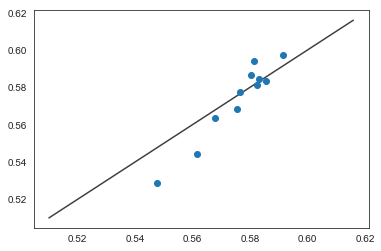

In [5]:
##  compare log forest with regularized LogReg
%matplotlib inline
fig, ax = plt.subplots()

ax.scatter(df_results.mean_wt_auc_xall_lbfgs_LF,
           df_results.mean_wt_auc_xall_lbfgs)
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.show()

In [6]:
## compare train/test
feature_x = np.matrix(xall)
membership_y = np.array(yall.gender_y)

clf = modelall
k_fold = StratifiedShuffleSplit(n_splits=1,
                                           test_size=0.1,
                                           random_state = 0)
for (train, test) in k_fold.split(feature_x, membership_y):
    print(train)
    clf.fit(feature_x[train], np.ravel(membership_y[train]))
    prob = clf.predict_proba(feature_x[train])
    print(metrics.roc_auc_score(label_binarize(membership_y[train],np.unique(membership_y)),
                                                                        prob[:,1],average='macro'))
    prob = clf.predict_proba(feature_x[test])
    print(metrics.roc_auc_score(label_binarize(membership_y[test],np.unique(membership_y)),
                                                                        prob[:,1],average='macro'))

[1698 2009  579 ... 1810 1235  884]
0.6432992775872493
0.5360438292964245


In [7]:
## sanity check logforest vs. reg-LogReg

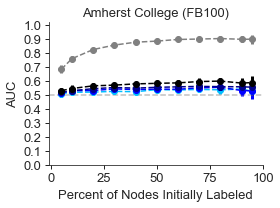

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

alpha_empirical = 0.4

%matplotlib inline
nbins = 45
f, (ax1) = plt.subplots(1, 1, 
                    sharey=False, sharex=False,
                figsize=(4,3))

plt.setp(ax1, xticks=[0,25,50,75,100])


ax1.set_xticks([0,25,50,75,100])
ax1.minorticks_on()
ax1.tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0, labelsize = 13)

w = 1.5
width = 0.15
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x1_lbfgs,
            yerr=df_results.se_wt_auc_x1, fmt='--o', capthick=2,
            alpha=1, elinewidth=3, color='deepskyblue')

ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x2_lbfgs,
    yerr=df_results.se_wt_auc_x2, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='blue')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_x3_lbfgs,
    yerr=df_results.se_wt_auc_x3, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='darkblue')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_auc_xall_lbfgs,
    yerr=df_results.se_wt_auc_xall, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='black')
ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_LINK_RM,
    yerr=df_results.se_wt_LINK_RM, fmt='--o', capthick=2,
    alpha=1, elinewidth=3, color='gray')

#ax1.errorbar(percent_initially_labelled*100, df_results.mean_wt_node2vec,
#    yerr=df_results.se_wt_node2vec, fmt='--o', capthick=2,
#    alpha=1, elinewidth=3, color='red')





## UPDATE HERE
#ax.set_xticklabels(x_ticks, rotation=0, fontsize=8)
#ax.set_yticklabels(y_ticks, rotation=0, fontsize=8)


ax1.set_ylabel('AUC', size=13)
ax1.set_xlabel('Percent of Nodes Initially Labeled', size=13)


#ax1.set_xlim(-1,np.max(np.array(range(len(acc_generic)))*w)+1)
ax1.set_ylim(0,1.02)
plt.yticks(np.arange(0,1.02,0.1))
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.set_xlim(-1,100)
plt.axhline(0.5, color='gray', linestyle='--', alpha = 0.5)

plt.title('Amherst College (FB100)',fontsize=13)
plt.tight_layout()
#plt.show()

#figs-ICWSM-revision


In [9]:
df_results = pd.DataFrame({'mean_wt_auc_x1_lbfgs': mean_wt_auc_x1_lbfgs,
                            'se_wt_auc_x1': se_wt_auc_x1,
                            'mean_wt_auc_x2_lbfgs': mean_wt_auc_x2_lbfgs,
                            'se_wt_auc_x2': se_wt_auc_x2,
                            'mean_wt_auc_x3_lbfgs': mean_wt_auc_x3_lbfgs,
                            'se_wt_auc_x3': se_wt_auc_x3,
                            'mean_wt_auc_xall_lbfgs': mean_wt_auc_xall_lbfgs,
                            'se_wt_auc_xall': se_wt_auc_xall,
                           'mean_wt_LINK_RM':mean_wt_LINK_RM,
                           'se_wt_LINK_RM': se_wt_LINK_RM,
                           #'mean_wt_node2vec':mean_wt_node2vec_C_LRCV,
                           #'se_wt_node2vec':se_wt_node2vec_LRCV
                            })
df_results.to_csv('NEWAmherstResultsICWSMRevision.csv',sep=',', index = False)

In [11]:
percent_initially_labelled

array([0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 0.95])